In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the world
rawworld = np.genfromtxt('world.csv', delimiter=',')

# Transfer world into a new array with walls all around to avoid edge cases
world = np.ones((np.size(rawworld,1)+2,np.size(rawworld,1)+2))
world[1:-1,1:-1] = rawworld

plt.imshow(world, cmap='binary')

In [3]:
# Starting and ending points
start = [1,1]
end = [20,20]

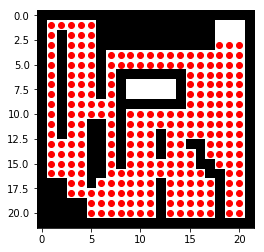

In [4]:
# Queue row data: current node x and y, heuristic cost, cost from origin, total score, parent node
queue = [[start, 0, 0, 0, start]]
# Closed list, prevents nodes from being opened more than once
closed = []

# Show the world to map nodes which have been opened
plt.imshow(world, cmap='binary')

# Find children in the queue (4-connected)
while queue:
    
    # Remove node from queue, add to closed nodes, plot the node
    node = queue.pop(0)
    closed.append(node)
    plt.plot(node[0][1],node[0][0], marker='o', color='red')
    
    # End when at goal
    if node[0] == end:
        queue = []
        
    for x in [-1,1]:
    
        # Open children if they are not in closed and are not a wall
        if not any([node[0][0]+x,node[0][1]] == closed[i][0] for i in range(len(closed))) and world[node[0][0]+x][node[0][1]] != 1:
            
            # Find current heuristic and path cost
            oCost = node[2] + 1
            hDist = np.sqrt((end[0] - node[0][0]+x)**2 + (end[1] - node[0][1])**2)
            
            if not any([node[0][0]+x,node[0][1]] == queue[i][0] for i in range(len(queue))):
                # Append node child to queue if it is not yet in it
                queue.append([[node[0][0]+x,node[0][1]], hDist, oCost, hDist+oCost, node[0]])
            
            elif any([i for i in range(len(queue)) if queue[i][0] == [node[0][0]+x,node[0][1]] and queue[i][3] > hDist+oCost]):    
                # If the node exists in the queue, and the new score is lower, update the node
                index = [i for i in range(len(queue)) if queue[i][0] == [node[0][0]+x,node[0][1]] and queue[i][3] > hDist+oCost][0]
                queue[index] = [[node[0][0]+x,node[0][1]], hDist, oCost, hDist+oCost, node[0]]
                
        if not any([node[0][0],node[0][1]+x] == closed[i][0] for i in range(len(closed))) and world[node[0][0]][node[0][1]+x] != 1:
            # Evaluate left and right of current node
            # Find current heuristic and path cost
            oCost = node[2] + 1
            hDist = np.sqrt((end[0] - node[0][0])**2 + (end[1] - node[0][1]+x)**2)
            
            if not any([node[0][0],node[0][1]+x] == queue[i][0] for i in range(len(queue))):
                # Append node child to queue if it is not yet in it
                queue.append([[node[0][0],node[0][1]+x], hDist, oCost, hDist+oCost, node[0]])
            
            elif any([i for i in range(len(queue)) if queue[i][0] == [node[0][0],node[0][1]+x] and queue[i][3] > hDist+oCost]):
                # If the node exists in the queue, and the new score is lower, update the node
                index = [i for i in range(len(queue)) if queue[i][0] == [node[0][0],node[0][1]+x] and queue[i][3] > hDist+oCost][0]
                queue[index] = [[node[0][0],node[0][1]+x], hDist, oCost, hDist+oCost, node[0]]
            
    queue.sort(key=lambda x: x[3])

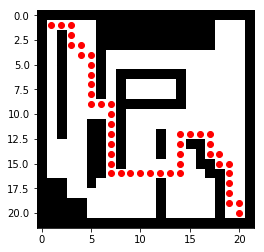

In [5]:
plt.imshow(world, cmap='binary')

# Trace ideal path back to beginning
parent = [end]
while parent[0] != start:
    plt.plot(parent[0][1],parent[0][0], marker='o', color='red')
    parent = [closed[x][4] for x in range(len(closed)) if closed[x][0] == parent[0]]
    
plt.plot(parent[0][1],parent[0][0], marker='o', color='red')

In [6]:
closed

[[[1, 1], 0, 0, 0, [1, 1]],
 [[2, 1], 27.586228448267445, 1, 28.586228448267445, [1, 1]],
 [[1, 2], 27.586228448267445, 1, 28.586228448267445, [1, 1]],
 [[3, 1], 26.870057685088806, 2, 28.870057685088806, [2, 1]],
 [[1, 3], 26.870057685088806, 2, 28.870057685088806, [1, 2]],
 [[4, 1], 26.1725046566048, 3, 29.1725046566048, [3, 1]],
 [[1, 4], 26.1725046566048, 3, 29.1725046566048, [1, 3]],
 [[2, 3], 26.248809496813376, 3, 29.248809496813376, [1, 3]],
 [[2, 4], 25.45584412271571, 4, 29.45584412271571, [2, 3]],
 [[5, 1], 25.495097567963924, 4, 29.495097567963924, [4, 1]],
 [[1, 5], 25.495097567963924, 4, 29.495097567963924, [1, 4]],
 [[3, 3], 25.495097567963924, 4, 29.495097567963924, [2, 3]],
 [[2, 5], 24.758836806279895, 5, 29.758836806279895, [2, 4]],
 [[3, 4], 24.758836806279895, 5, 29.758836806279895, [3, 3]],
 [[4, 3], 24.758836806279895, 5, 29.758836806279895, [3, 3]],
 [[6, 1], 24.839484696748443, 5, 29.839484696748443, [5, 1]],
 [[3, 5], 24.041630560342615, 6, 30.041630560342615,